# Setup
Import TensorFlow and other necessary libraries:

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

## Download the dataset

In [6]:
!unzip archive.zip

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating: tr

## Standardize the data

In [89]:
train = ImageDataGenerator(rescale=1./255)
val = ImageDataGenerator(rescale=1./255)

## Create a dataset

In [84]:
train_dir = 'train'
val_dir = 'test'
train_ds = train.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

val_ds= val.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## Create the convolutional base

In [85]:
emotion_model = Sequential()
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

## Compile and train the mode

In [87]:
emotion_model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001, decay=1e-6),metrics=['accuracy'])

In [88]:
emotion_model_info = emotion_model.fit(
        train_ds,
        steps_per_epoch=28709 // 64,
        epochs=50,
        validation_data=val_ds,
        validation_steps=7178 // 64)

Epoch 1/50
448/448 [==============================] - 12s 26ms/step - loss: 1.7988 - accuracy: 0.2635 - val_loss: 1.7043 - val_accuracy: 0.3538
Epoch 2/50
448/448 [==============================] - 11s 25ms/step - loss: 1.6349 - accuracy: 0.3600 - val_loss: 1.5613 - val_accuracy: 0.4049
Epoch 3/50
448/448 [==============================] - 12s 27ms/step - loss: 1.5363 - accuracy: 0.4090 - val_loss: 1.4829 - val_accuracy: 0.4277
Epoch 4/50
448/448 [==============================] - 13s 28ms/step - loss: 1.4540 - accuracy: 0.4403 - val_loss: 1.3921 - val_accuracy: 0.4699
Epoch 5/50
448/448 [==============================] - 12s 27ms/step - loss: 1.3978 - accuracy: 0.4698 - val_loss: 1.3476 - val_accuracy: 0.4915
Epoch 6/50
448/448 [==============================] - 11s 25ms/step - loss: 1.3484 - accuracy: 0.4890 - val_loss: 1.3109 - val_accuracy: 0.5022
Epoch 7/50
448/448 [==============================] - 11s 26ms/step - loss: 1.3030 - accuracy: 0.5060 - val_loss: 1.2815 - val_accuracy:

## Visualize training results
Create plots of the loss and accuracy on the training and validation sets:

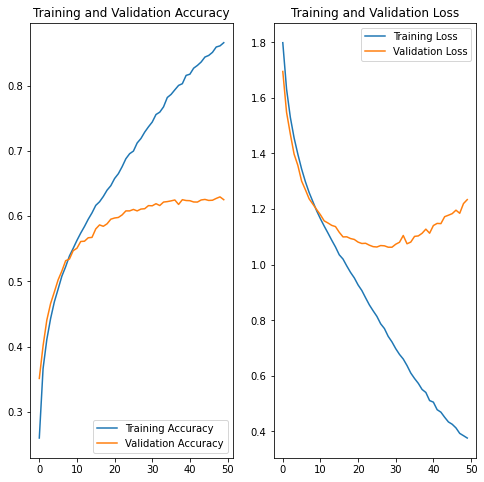

In [43]:
acc = emotion_model_info.history['accuracy']
val_acc = emotion_model_info.history['val_accuracy']

loss = emotion_model_info.history['loss']
val_loss = emotion_model_info.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [44]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

## Predict on new data

In [46]:
from tensorflow.keras.utils import load_img , img_to_array
import numpy as np
import matplotlib.pyplot as plt

1/1 [==============================] - 0s 16ms/step


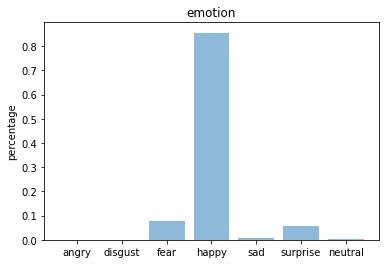

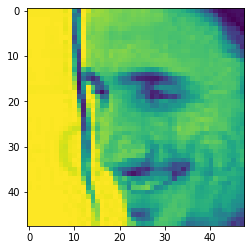

27.67 percent confidence.


In [81]:

file = '/content/test/happy/PrivateTest_14103671.jpg'
img=load_img(file,color_mode="grayscale", target_size=(48, 48))

x = img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = emotion_model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.imshow(img)
plt.show()
print(
    "{:.2f} percent confidence."
    .format( 100 * np.max(tf.nn.softmax(custom[0])))
)

1/1 [==============================] - 0s 15ms/step


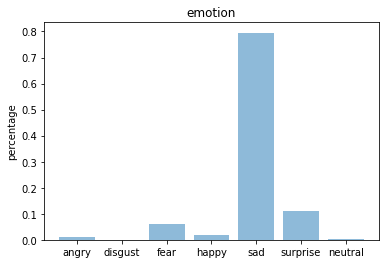

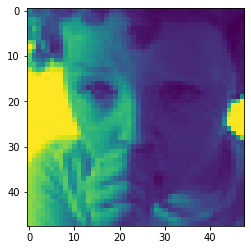

26.28 percent confidence.


In [80]:

file = '/content/test/sad/PrivateTest_13593494.jpg'
img=load_img(file,color_mode="grayscale", target_size=(48, 48))

x = img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = emotion_model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.imshow(img)
plt.show()
print(
    "{:.2f} percent confidence."
    .format( 100 * np.max(tf.nn.softmax(custom[0])))
)